### 1. Data Preprocessing

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.BRCA.sampleMap_BRCA_clinicalMatrix  TCGA.SARC.sampleMap_HiSeqV2_PANCAN
TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	 TCGA.SARC.sampleMap_SARC_clinicalMatrix
TCGA.MESO.sampleMap_HiSeqV2_PANCAN	 TCGA.THYM.sampleMap_HiSeqV2_PANCAN
TCGA.MESO.sampleMap_MESO_clinicalMatrix  TCGA.THYM.sampleMap_THYM_clinicalMatrix


In [3]:
!pip install sparse_lmm

In [5]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA_Ocular_melanomas_(UVM)/TCGA.UVM.sampleMap_UVM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA_Ocular_melanomas_(UVM)/TCGA.UVM.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [6]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UVM_mutation_bcm_gene,_GENOMIC_ID_TCGA_UVM_hMethyl450,_GENOMIC_ID_TCGA_UVM_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_UVM_mutation_broad_gene,_GENOMIC_ID_TCGA_UVM_RPPA,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_UVM_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UVM_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/UVM/miRNA_HiSeq_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39X-05,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39W-08,NaN,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39X-05,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39W-08,9A2C60AE-C0F6-4AFF-B7A2-517D8CD8FFBF,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39X-05,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39W-08,NaN,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39X-05,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39W-08,NaN,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01,TCGA-V4-A9E5-01
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39X-05,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39W-08,NaN,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01,TCGA-V4-A9E7-01


In [7]:
gene_data.head()

,TCGA-VD-A8KM-01,TCGA-V4-A9F4-01,TCGA-WC-A881-01,TCGA-V4-A9F1-01,TCGA-VD-AA8N-01,TCGA-V4-A9EY-01,TCGA-V4-A9EI-01,TCGA-VD-AA8O-01,TCGA-WC-A880-01,TCGA-WC-A882-01,...,TCGA-YZ-A983-01,TCGA-V3-A9ZY-01,TCGA-V4-A9EE-01,TCGA-VD-A8KA-01,TCGA-V4-A9F2-01,TCGA-V4-A9EF-01,TCGA-V4-A9E7-01,TCGA-VD-A8K7-01,TCGA-VD-AA8R-01,TCGA-VD-AA8S-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.328308,0.181808,-0.675092,-0.099592,-0.923192,0.856308,-0.500792,-1.383992,-0.610992,0.314408,...,-0.342392,0.759608,-0.345992,-0.542592,0.091708,-0.422092,-1.492392,-0.147592,0.101408,-0.384292
HIF3A,-2.024226,4.083274,0.930474,-2.625726,0.266874,-1.676226,1.174074,-3.701426,-3.911226,-0.047726,...,-3.762626,-2.163926,-1.036026,0.591874,1.572974,-1.473726,-0.380626,1.209374,-3.264126,-0.846326
RNF17,-0.531035,0.121665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,1.034565,0.083565,-0.531035,...,-0.531035,-0.531035,-0.531035,0.724565,-0.531035,0.488565,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.617928,0.004928,0.052728,0.167428,0.567828,0.717928,-0.043372,-0.467072,0.344028,0.322328,...,0.309428,0.621628,-0.025972,0.234828,0.340328,0.226928,0.108028,-0.047772,0.080928,0.250728
RNF11,-0.135878,0.220722,-1.941478,0.077722,-1.054078,-1.287178,-0.350778,-0.983478,-0.087778,-2.554178,...,0.281922,-0.827378,-0.493578,-1.849978,-0.754078,-0.660978,-1.989578,0.357522,0.989322,-1.179378


In [8]:
trait = 'Ocular Melanomas'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 96 features, and the gene dataset includes 20530 genes


In [9]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [10]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,0.0,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,150.0,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,20.0,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,0.0,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,40.0,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [11]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,0.0,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,150.0,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,20.0,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,0.0,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,40.0,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


### 2. Preliminary analysis

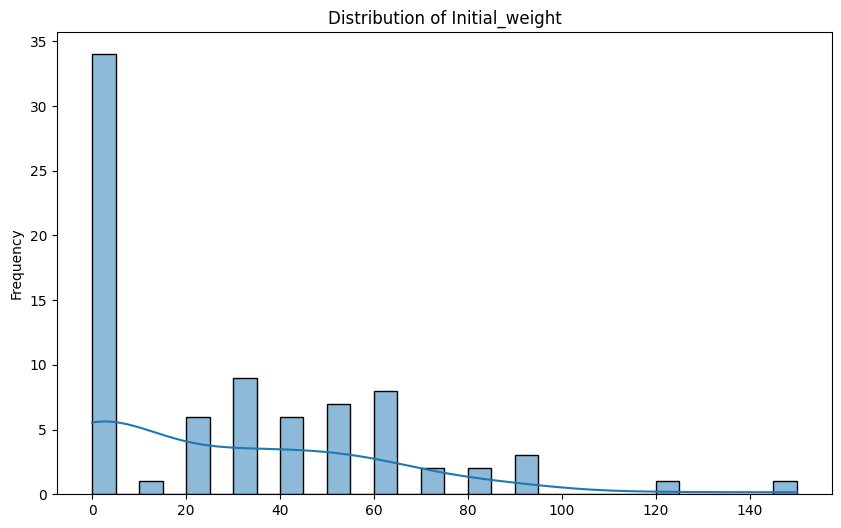

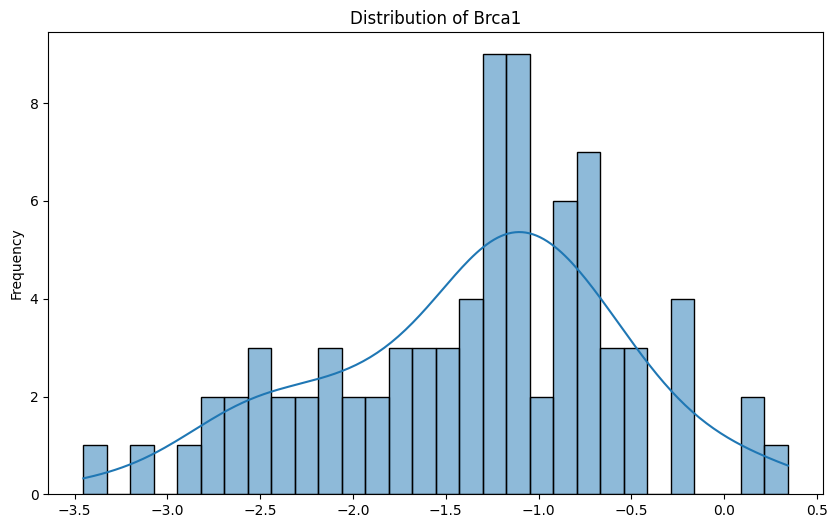

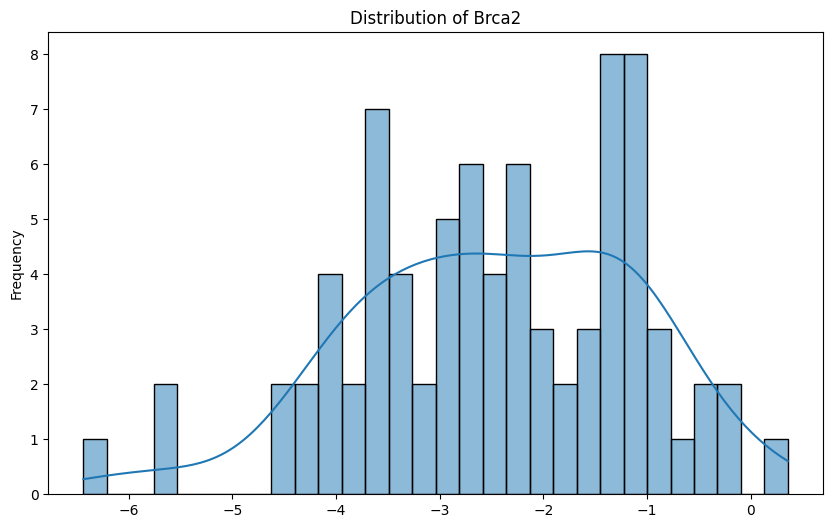

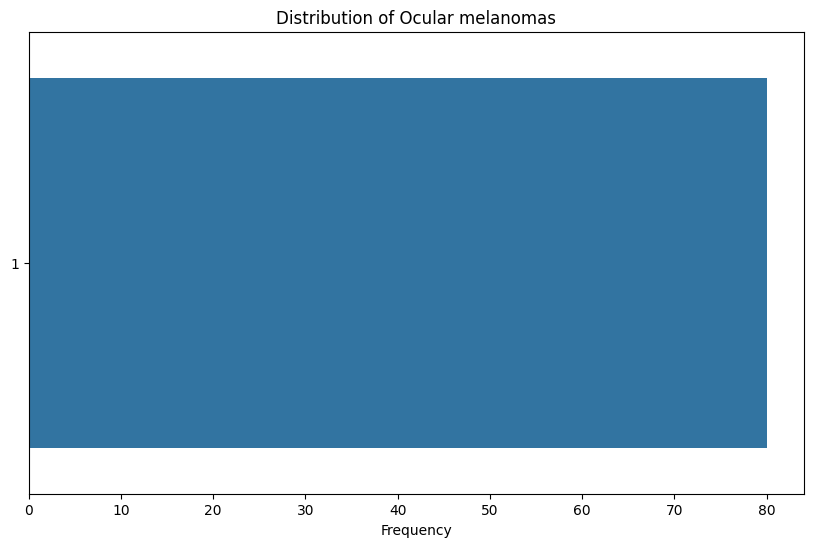

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

In [13]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,0,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,0,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,0,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,0,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,0,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


### 3. Do regression & Cross Validation

In [14]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [15]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-14-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-14-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-14-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 55.00% ± 11.46%


In [16]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-14-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [17]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-14-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


### 4. Discussion

In [18]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: 0.0000
p-value: 1



In [19]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

流式输出内容被截断，只能显示最后 5000 行内容。
         ADRA2A -9.026759e-32       1.239701e-14
          CREB5 -1.383391e-31       1.242032e-14
           FGF3 -9.440680e-32       1.246813e-14
         ZSWIM5 -6.735645e-32       1.248680e-14
          CPSF3  1.069915e-31       1.248750e-14
       C6orf167  3.006686e-31       1.251852e-14
        FOXD4L2  8.133698e-32       1.256454e-14
          BAZ1B -1.658222e-31       1.258774e-14
          PSMA8 -5.026666e-32       1.260257e-14
          HSPB3 -1.017210e-31       1.260615e-14
        CCDC108 -1.763348e-31       1.260878e-14
         ZNF271  4.558682e-31       1.263884e-14
           MED7  1.440334e-31       1.263949e-14
         PARP12  1.595088e-31       1.264088e-14
         ZNF133  1.848520e-31       1.265459e-14
        CCDC129 -2.324377e-31       1.271927e-14
          SCAF1 -2.377552e-31       1.278042e-14
         HOXD10  3.752203e-31       1.278042e-14
          ANPEP  2.362175e-31       1.278042e-14
           MECR -3.411729e-31       1.2783